<a href="https://colab.research.google.com/github/dvsumanth07/deepLearning/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

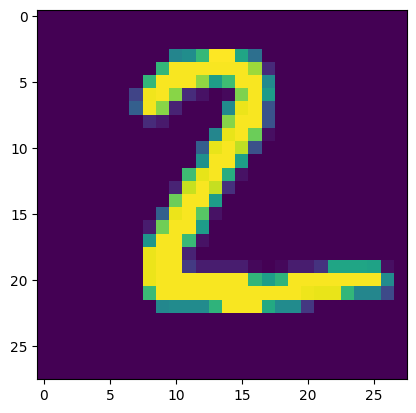

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_test[1])

In [9]:
X_train=X_train/255
X_test=X_test/255

In [12]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [23]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2440 - val_loss: 0.2369
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2374 - val_loss: 0.2316
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2311 - val_loss: 0.2268
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2245 - val_loss: 0.2227
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2187 - val_loss: 0.2169
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2131 - val_loss: 0.2126
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2075 - val_loss: 0.2073
Epoch 8/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2023 - val_loss: 0.2029
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1969 - val_loss: 0.2006
Epoch 10/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.

In [25]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [26]:
y_pred=y_prob.argmax(axis=1)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.862

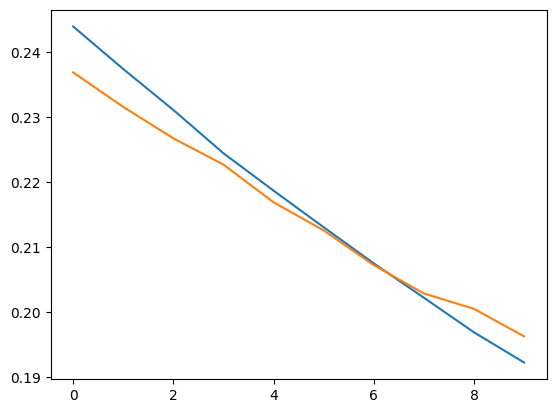

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])